In [ ]:
import numpy as np
import math as m

In [ ]:
points = []
training_out = []
E0 = 0.1
N = 300;
allNum = N * 2

In [ ]:
def getCircleLabel(p, center, radius):
  return 1 if m.dist(p, center) < (radius * 0.5) else 0

def genCircle(center, radius):
  for _ in range(N):
    r = np.random.uniform(0, radius * 0.5)
    angle = np.random.uniform(0, 2 * np.pi)
    x = r * np.sin(angle)
    y = r * np.cos(angle)
    eps_x = np.random.uniform(-E0, E0)
    eps_y = np.random.uniform(-E0, E0)
    label = getCircleLabel((x + eps_x, y + eps_y), center, radius)
    points.append([x + eps_x, y + eps_y])
    training_out.append(label)
  for _ in range(N):
    r = np.random.uniform(radius * 0.7, radius)
    angle = np.random.uniform(0, 2 * np.pi)
    x = r * np.sin(angle)
    y = r * np.cos(angle)
    eps_x = np.random.uniform(-E0, E0)
    eps_y = np.random.uniform(-E0, E0)
    label = getCircleLabel((x + eps_x, y + eps_y), center, radius)
    points.append([x + eps_x, y + eps_y])
    training_out.append(label)


In [ ]:
def getXorLabel(p):
  return 1 if p["x"] * p["y"] >= 0 else 0

def genXor():
  len = 4
  for _ in range(allNum):
    x = np.random.uniform(-len, len)
    padding = 0.3
    x += padding if x > 0 else -padding
    y = np.random.uniform(-len, len)
    y += padding if y > 0 else -padding
    eps = np.random.uniform(-E0, E0)
    label = getXorLabel({"x": x + eps, "y": y + eps})
    points.append([x + eps, y + eps])
    training_out.append(label)

In [ ]:
def genSpiral(deltaT, label):
  for i in range(N):
    r = i / N * 5
    t = 1.75 * i / N * 2 * np.pi + deltaT
    eps = np.random.uniform(-E0, E0)
    x = r * np.sin(t) + eps
    y = r * np.cos(t) + eps
    points.append([x, y])
    training_out.append(label)

In [ ]:
def genGauss(cx, cy, label):
  for i in range(N):
    x = np.random.normal(cx, E0)
    y = np.random.normal(cy, E0)
    points.append([x, y])
    training_out.append(label)

In [ ]:
genCircle((0,0), 5)

In [ ]:
genXor()

In [ ]:
genSpiral(0, 1)
genSpiral(np.pi, 0)

In [ ]:
genGauss(2, 2, 1)
genGauss(-2, -2, 0)

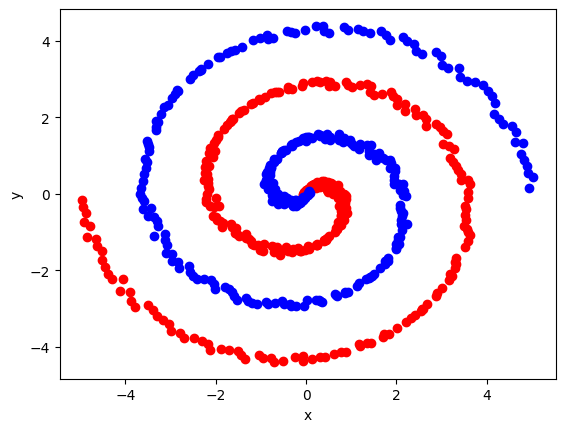

In [ ]:
import matplotlib.pyplot as plt

def getCoords(p, labels, label, coord):
  arr =[]
  for i in range(len(p)):
    if labels[i] == label:
      arr.append(p[i][coord])
  return arr

#plt.ylim(-1, 1)

plt.scatter(getCoords(points, training_out, 1, 0), getCoords(points, training_out, 1, 1), color='red')
plt.scatter(getCoords(points, training_out, 0, 0), getCoords(points, training_out, 0, 1), color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [ ]:
#обучение элементарного десиптикона

w = 2 * np.random.random(2) - 1
print(w)

q = 0.1
offset = np.random.rand(1)

for _ in range(1000):
  for x, label in zip(points, training_out):
    output = sigmoid(np.dot(x, w) + offset)
    err = label - output

    sigmaGrad = output * (1 - output)
    w += q * err * sigmaGrad * np.array(x)
    offset += q * err * sigmaGrad

print(w)
#print(outputs)

[-0.35655606  0.52321157]
[ 0.04597719 -0.53032631]


In [ ]:
def predict(input):
  if sigmoid(np.dot(input, w) + offset) > 0.5:
    return 1
  else:
    return 0

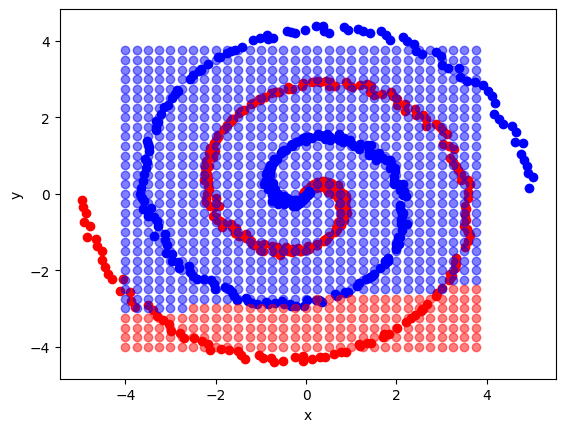

In [ ]:
plt.scatter(getCoords(points, training_out, 1, 0), getCoords(points, training_out, 1, 1), color='red')
plt.scatter(getCoords(points, training_out, 0, 0), getCoords(points, training_out, 0, 1), color='blue')

coords = []
labels = []
i = -4
while (i < 4):
  j = -4
  while (j < 4):
    if predict([i, j]) == 1:
      coords.append([i,j])
      labels.append(1)
    else:
      coords.append([i,j])
      labels.append(0)
    j += 0.25
  i += 0.25

plt.scatter(getCoords(coords, labels, 1, 0), getCoords(coords, labels, 1, 1), color='red', alpha=0.5)
plt.scatter(getCoords(coords, labels, 0, 0), getCoords(coords, labels, 0, 1), color='blue', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
points = []
training_out = []
#genGauss(2, 2, 1)
#genGauss(-2, -2, 0)
#genSpiral(0, 1)
#genSpiral(np.pi, 0)
#genCircle((0,0), 5)
#genXor()

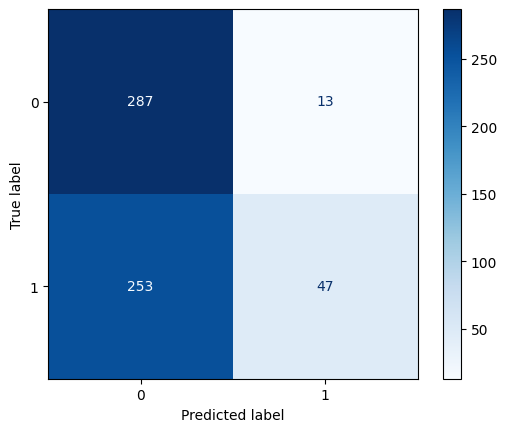

In [ ]:
#матрица

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

ans = []
for i in range(allNum):
  ans.append(predict([points[i][0], points[i][1]]))

yy = confusion_matrix(training_out, ans)
acc = accuracy_score(training_out, ans)
ConfusionMatrixDisplay(yy, display_labels=[0,1]).plot(include_values=True, cmap='Blues')

In [ ]:
#обучение отряда десиптиконов

q = 0.1
numDecip = 10
w = 2 * np.random.random((numDecip, 2)) - 1
print(w.shape)
offsets = np.random.rand(numDecip)


for _ in range(100):
  for x, label in zip(points, training_out):
    output = [sigmoid(np.dot(x, w[i]) + offsets[i]) for i in range(numDecip)]

    for i in range(numDecip):
      err = label - output[i]
      sigmaGrad = output[i] * (1 - output[i])
      w[i] += q * err * sigmaGrad * np.array(x)
      offsets[i] += q * err * sigmaGrad

#print(w)
#print(outputs)

(10, 2)


In [ ]:
def predictSquad(input):
  pred = [sigmoid(np.dot(input, w[i]) + offsets[i]) for i in range(numDecip)]
  return 1 if sum(pred) / numDecip > 0.5 else 0


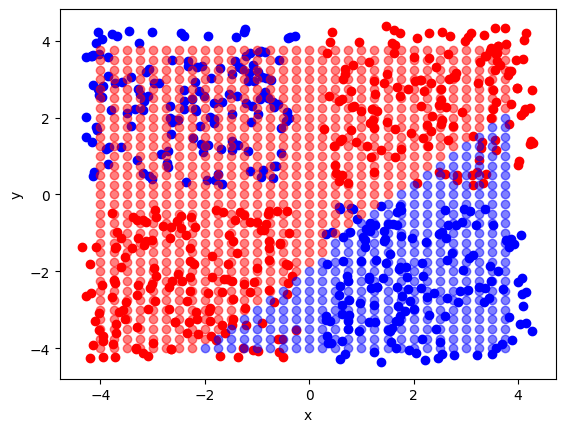

In [ ]:
#test отряда
plt.scatter(getCoords(points, training_out, 1, 0), getCoords(points, training_out, 1, 1), color='red')
plt.scatter(getCoords(points, training_out, 0, 0), getCoords(points, training_out, 0, 1), color='blue')

coords = []
labels = []
i = -4
while (i < 4):
  j = -4
  while (j < 4):
    if predictSquad([i, j]) == 1:
      coords.append([i,j])
      labels.append(1)
    else:
      coords.append([i,j])
      labels.append(0)
    j += 0.25
  i += 0.25

plt.scatter(getCoords(coords, labels, 1, 0), getCoords(coords, labels, 1, 1), color='red', alpha=0.5)
plt.scatter(getCoords(coords, labels, 0, 0), getCoords(coords, labels, 0, 1), color='blue', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
points = []
training_out = []
genGauss(2, 2, 1)
genGauss(-2, -2, 0)
#genSpiral(0, 1)
#genSpiral(np.pi, 0)
#genCircle((0,0), 5)
#genXor()

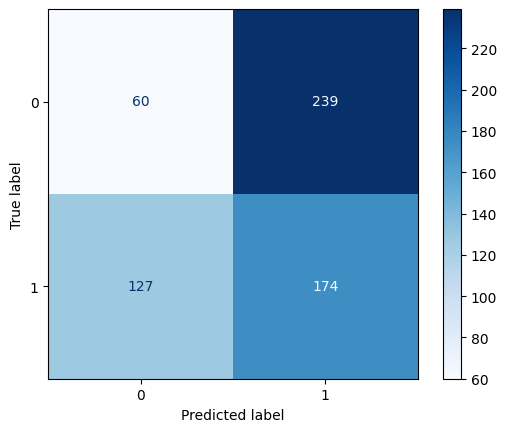

In [ ]:
#матрица

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

ans2 = []
for i in range(allNum):
  ans2.append(predictSquad([points[i][0], points[i][1]]))

yy = confusion_matrix(training_out, ans2)
acc = accuracy_score(training_out, ans2)
ConfusionMatrixDisplay(yy, display_labels=[0,1]).plot(include_values=True, cmap='Blues')